SVM example
------

To avoid additional dependencies, this uses a very inefficient SVM optimiser!

In [399]:
import numpy as np
import pylab as plt
import simplesvm
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Generate some data
trainx = np.vstack((np.random.randn(50,2),np.random.randn(50,2)+4))
traint = np.hstack((-1*np.ones(50,),np.ones(50,)))[:,None]


# Uncomment this if you want to add noise (last bit of exercise)
for i in range(3):
    pos = np.random.randint(50)
    if traint[pos] == -1:
        traint[pos] = 1
    else:
        traint[pos] = -1




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


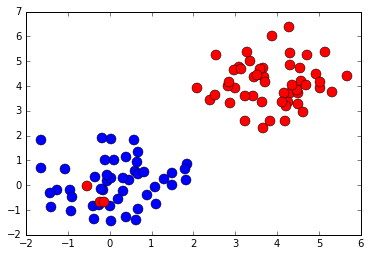

In [400]:
plt.figure()
c0 = np.where(traint==-1)[0]
c1 = np.where(traint==1)[0]
plt.plot(trainx[c0,0],trainx[c0,1],'bo',markersize=10)
plt.plot(trainx[c1,0],trainx[c1,1],'ro',markersize=10)

The following creates the SVM object. You can vary the kernel type (linear or rbf), the kpar (only makes a difference for rbf) and C

In [417]:
svm = simplesvm.SimpleSVM(trainx,traint,kernel='rbf',C=1.0)

Now call the optimiser to train the SVM

In [418]:
svm.smo_optimise()

The following block creates a grid of data points and then evaluates the SVM function at each point. We can then draw contours.

In [419]:
xvals = np.arange(-3,6,0.1)
Ngrid = len(xvals)
gridpred = np.zeros((Ngrid,Ngrid))
for i in range(len(xvals)):
    for j in range(len(xvals)):
        pp = np.hstack((xvals[i],xvals[j]))
        gridpred[i][j] = svm.test_predict(pp)

Plot the data and the contours. The support vectors are highlighted.

<a list of 7 text.Text objects>

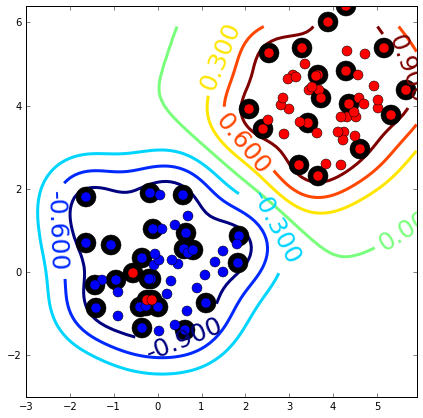

In [420]:
plt.figure(figsize=(7,7))
c0 = np.where(traint==-1)[0]
c1 = np.where(traint==1)[0]
sv = np.where(svm.alpha>1e-6)[0]

plt.plot(trainx[sv,0],trainx[sv,1],'ko',markersize=20)
plt.plot(trainx[c0,0],trainx[c0,1],'bo',markersize=10)
plt.plot(trainx[c1,0],trainx[c1,1],'ro',markersize=10)
A = plt.contour(xvals,xvals,gridpred.T,linewidths=3)
plt.clabel(A, inline=1, fontsize=25)

Look at the alpha values

In [383]:
print np.hstack((traint,svm.alpha))

[[ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   2.49199641e-01]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   3.23502013e-01]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 [ -1.00000000e+00   0.00000000e+00]
 